# SID resolution manipulations

In [1]:
import starepandas
import pystare
import geopandas
import matplotlib.pyplot as plt

In [2]:
sids = [2299437706637111721, 2299435211084507593, 2299566194809236969]
sdf = starepandas.STAREDataFrame(sids=sids)        

## Change resolutions

In [5]:
sdf.to_stare_level(level=6, clear_to_level=False)

,sids
0,2299437706637111718
1,2299435211084507590
2,2299566194809236966


## Clear Resolution

In [6]:
sdf.clear_to_level(inplace=False)

,sids
0,2299437254470270985
1,2299435055447015433
2,2299564797819093001


In [21]:
    .dtype

dtype('int64')

In [24]:
import pandas
pandas.api.types.is_integer_dtype(sdf['sids'])

True

## To single resolution

In [7]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
europe  = world[world.continent=='Europe']
europe = starepandas.STAREDataFrame(europe, add_sids=True, level=7, add_trixels=True)

/tmp/ipykernel_44909/3598604040.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [8]:
europe2 = europe.to_stare_singlelevel()
trixels = europe2.make_trixels()
europe2.set_trixels(trixels, inplace=True)

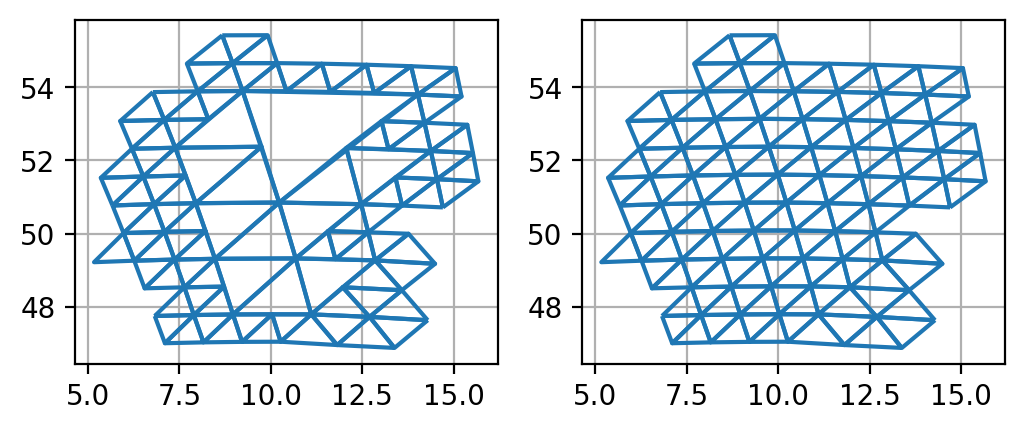

In [7]:
fig, ax = plt.subplots(1, 2, dpi=200, figsize=(6,6))
ax[0].grid(True)
ax[1].grid(True)
            
europe[europe.name=='Germany'].plot(ax=ax[0], trixels=True)
europe2[europe2.name=='Germany'].plot(ax=ax[1], trixels=True)

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

In [8]:
len(europe2.sids.iloc[0])

4533

In [ ]:
europe['sids'].dtype

## Midwest example

In [41]:
regions = geopandas.read_file('../tests/data/cb_2019_us_region_5m.zip')
regions = starepandas.STAREDataFrame(regions)
region_sids = regions.make_sids(level=7, convex=False)
regions.set_sids(region_sids, inplace=True)
midwest = regions[regions['NAME']=='Midwest']
trixels = midwest.make_trixels()
midwest = midwest.set_trixels(trixels)

<Axes: >

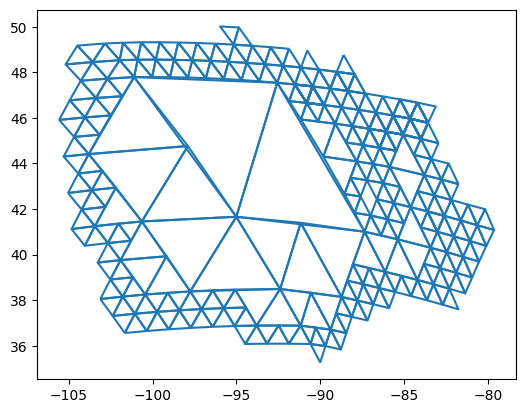

In [42]:
midwest.plot()

<Axes: >

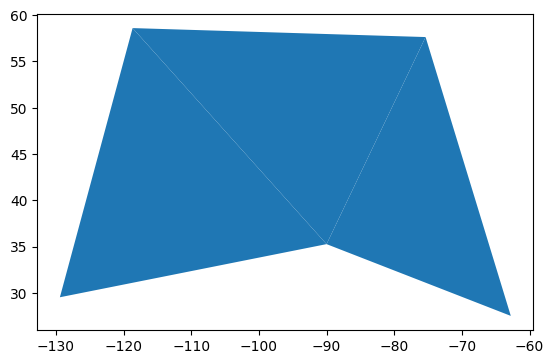

In [43]:
midwest.to_stare_singlelevel(2).make_trixels().plot()